# Spin-zero two-point correlations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pickle

#%matplotlib inline

Load data

In [2]:
with open('../../Data/CorrSpin0L1001N1000tbeta1.pickle', 'rb') as pfile:
    structure = pickle.load(pfile)

corr_ninj0p=structure['corr_ninj0pF']
N=structure['NF']
L=structure['LF']
h=structure['hF']
Nl=int((L)/2)

Generate the figure

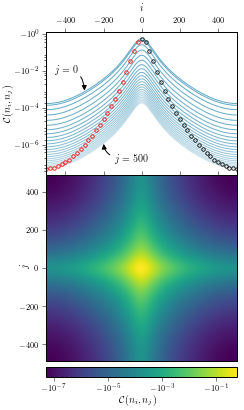

In [3]:
with plt.style.context('../aps1.mplstyle'):

    Index0p=np.arange(-Nl,Nl+1)
    gratio=(np.sqrt(5)+1)/2-.3
    fig0p, ax0p = plt.subplots(2,1,figsize=[246.0*1.0/72.27,246.0*1.0/72.27*(1.2+1/gratio)*1.015],sharex=True,gridspec_kw={'hspace': 0,'height_ratios': [1/gratio, 1+.2]})
    
    a=.2
    for shift in range(Nl,L,20):
        test1=np.zeros(L)
        Index_test=np.zeros(L)
        for k in range(0,L):
            test1[k]=-corr_ninj0p[k,shift]
            Index_test[k]=k-(L-1)/2
            if ((k==L-1-shift) &(k != Nl)):
                ax0p[0].plot(Index_test[k],test1[k],'.',label=r'$\beta\Delta=,%.3f$',zorder=2,ms=7.0,markerfacecolor='None',markeredgewidth = '0.8',color='#ff0000')
            if k==shift:
                ax0p[0].plot(Index_test[k],test1[k],'.',label=r'$\beta\Delta=,%.3f$',zorder=2,ms=7.0,markerfacecolor='None',markeredgewidth = '0.8',color='#000000')
        ax0p[0].plot(Index_test,test1,'-',label=r'$\beta\Delta=,%.3f$',zorder=1,ms=1,markerfacecolor='None',linewidth = 1,color='#3d94b8',alpha=1-(a+((shift-Nl)/(Nl+1))**2*(1-a)))

    for ax in ax0p:
        ax.label_outer()
        
    ax0p[0].set_xlabel(r'$i$')
    ax0p[0].set_xlim(-500, 500) 
    ax0p[0].tick_params(axis='x', labelbottom="off", labeltop="on")
    ax0p[0].xaxis.set_label_coords(0.5  ,1.2)
    ax0p[0].tick_params(axis='x', which='bottom', length=0)
    ax0p[0].set_yscale('log')
    ax0p[0].set_yticks([1,1.0e-2,1.0e-4,1.0e-6])
    ax0p[0].set_yticklabels([r'$-10^{0}$', r'$-10^{-2}$', r'$-10^{-4}$',r'$-10^{-6}$'])
    ax0p[0].set_ylabel(r'$\mathcal{C}(n_{i},n_j)$')
    ax0p[0].yaxis.set_label_coords(-0.17, 0.5)
    
    
    ax0p[0].annotate(r'$j=0$', xy=(-300,0.0007), xycoords='data',
                xytext=(-30,20), textcoords='offset points',
                arrowprops=dict(arrowstyle='-|>',fc='0.0',
                                connectionstyle="angle3,angleA=0,angleB=-90"))
    ax0p[0].annotate(r'$j=500$', xy=(-200,0.0000015), xycoords='data',
                xytext=(10,-20), textcoords='offset points',
                arrowprops=dict(arrowstyle='-|>',fc='0.0',
                                connectionstyle="angle3,angleA=0,angleB=-90"))

    ###############################################################
    im0p = ax0p[1].pcolormesh(Index0p,Index0p,-corr_ninj0p,rasterized=True,norm=colors.LogNorm())
    cb=fig0p.colorbar(im0p,ax=ax0p[1],label=r'$\mathcal{C}(n_{i},n_j)$',ticks=[1.0e-1, 1.0e-3,1.0e-5, 1.0e-7],pad=0.03,orientation="horizontal")
    cb.ax.set_xticklabels([r'$-10^{-1}$', r'$-10^{-3}$', r'$-10^{-5}$',r'$-10^{-7}$'])
    cb.ax.xaxis.set_label_coords(0.48,-2.0)
    
    ax0p[1].tick_params(axis='x', labelbottom="off", labeltop="off")

    ticklab = ax0p[1].yaxis.get_ticklabels()[0]
    trans = ticklab.get_transform()
    ax0p[1].yaxis.set_label_coords(-.05, 0, transform=trans)
    ax0p[1].set_ylabel(r'$j$')
    ax0p[1].set_aspect(1)
    ##############################

    #plt.savefig('CorrSpin0L1001N1000tbeta1.pdf', transparent=False) 
    #plt.savefig('CorrSpin0L1001N1000tbeta1.svg', transparent=False) 
    plt.show()
    